In [1]:
import tensorflow as tf

In [2]:
tf.__version__

'2.1.0'

In [16]:
mnist = tf.keras.datasets.mnist # 28 * 28 images of hand written digits 0-9

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = tf.keras.utils.normalize(X_train, axis = 1)
X_test = tf.keras.utils.normalize(X_test, axis = 1)

model = tf.keras.models.Sequential() # simple model
model.add( tf.keras.layers.Flatten() ) #first layer - input layer. Flatten layer makes our work easy
model.add( tf.keras.layers.Dense( 128, activation = tf.nn.relu ) ) # Hidden layer - 128 neurons
model.add( tf.keras.layers.Dense( 128, activation = tf.nn.relu ) ) # Hidden layer - 128 neurons
model.add( tf.keras.layers.Dense( 10, activation = tf.nn.softmax ) ) # Output layer - no of neurons is no of classifications.
# Output layer needs probability distribution and softmax is good. we dont want to be relu
# Training of model
model.compile(optimizer = "adam", # It is default go to. you can use gradient descent. it is most complesx part of NN. 
              loss = 'sparse_categorical_crossentropy', # It is most popular. In case cats/dogs you can use binary
              # Loss is degree of error, NN does not try to maximize the accuracy, it always tries to minimize the loss.
              metrics = ["accuracy"])
model.fit(X_train, y_train, epochs = 3)

Train on 60000 samples
Epoch 1/3
60000/60000 [==============================] - 10s 170us/sample - loss: 0.2598 - accuracy: 0.9233
Epoch 2/3
60000/60000 [==============================] - 7s 116us/sample - loss: 0.1064 - accuracy: 0.9669
Epoch 3/3
60000/60000 [==============================] - 7s 123us/sample - loss: 0.0730 - accuracy: 0.9770


In [17]:
# NN are great at fitting and they can overfit. Idea is model has to be generalized.
# Model learns patterns and actual attributes to what makes it 4 or 8 rather than memorizing all the samples you have passed.

# what we always do is calculate the validation loss and validation accuracy
val_loss, val_acc = model.evaluate(X_test, y_test)
print( val_loss, val_acc )

# If you comare with the epoch 3 result, the loss is now slightly higher and accuracy is slightly lower. You should expect this.
# What you should not see is too close or toooo much of a delta. If there is a big gap then you most probably overfitting.

10000/10000 [==============================] - 1s 92us/sample - loss: 0.0885 - accuracy: 0.9722
0.08852266122354195 0.9722


In [18]:
# Save a model and load a model
model.save("epic_num_reader.model")

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: epic_num_reader.model\assets


In [22]:
new_model = tf.keras.models.load_model("epic_num_reader.model")

In [24]:
predictions = new_model.predict(X_test)
# Input samples. It could be:
#      - A Numpy array (or array-like), or a list of arrays
#        (in case the model has multiple inputs).
#      - A TensorFlow tensor, or a list of tensors
#        (in case the model has multiple inputs).
#      - A `tf.data` dataset.
#      - A generator or `keras.utils.Sequence` instance.
#      A more detailed description of unpacking behavior for iterator types
#      (Dataset, generator, Sequence) is given in the `Unpacking behavior
#      for iterator-like inputs` section of `Model.fit`.

In [25]:
print(predictions) #not too friendly and these are probability distributions.

[[4.94362325e-07 7.22985760e-06 1.32233836e-05 ... 9.97821808e-01
  1.17470017e-06 1.45484341e-06]
 [8.27611257e-10 4.30607543e-05 9.99950290e-01 ... 8.16647727e-09
  2.29714715e-07 4.97211159e-13]
 [2.00160457e-07 9.99788463e-01 7.41721524e-05 ... 8.11870050e-05
  3.27865018e-05 1.72570338e-07]
 ...
 [5.11621578e-10 2.49238195e-08 2.88825230e-09 ... 4.35513994e-06
  2.00271779e-06 4.08717140e-04]
 [9.12313141e-08 4.10012717e-08 1.02024424e-08 ... 6.07244090e-07
  3.99684533e-04 1.82267144e-08]
 [1.52494096e-07 1.22518884e-09 2.35106175e-08 ... 2.96939686e-12
  3.49341548e-07 7.49449125e-09]]


In [28]:
import numpy as np
print(np.argmax(predictions[1]))

2


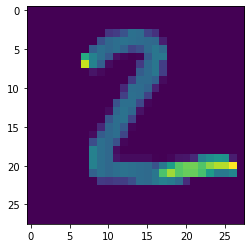

In [29]:
plt.imshow(X_test[1])
plt.show()

In [23]:
type(X_test)

numpy.ndarray

In [7]:
import matplotlib.pyplot as plt

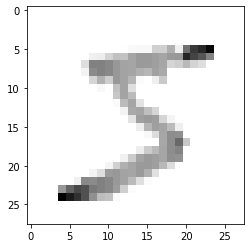

In [12]:
plt.imshow( X_train[0], cmap = plt.cm.binary )
plt.show()

In [13]:
print(X_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    